# This jupyter notebook is prepared by “Nawras Rawas Qalaji”.

#1. Load Data and perform basic EDA 


In [145]:
#I. import neccessary libriaries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import scipy.stats as st
import nltk
import string
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer


In [122]:
#nltk.download() #will take time. You can also download individual items such as nltk.download('wordnet'), nltk.download('stopwords')
nltk.download('wordnet') 
nltk.download('averaged_perceptron_tagger') 
nltk.download('punkt') 
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [146]:
#II. import hrdata.csv to hrdata dataframe
#dataFile = open("/content/drive/MyDrive/Colab Notebooks/news.csv", "r") 
#hrdata = pd.DataFrame([line.rstrip() for line in open("/content/drive/MyDrive/Colab Notebooks/news.csv")])
#code above revealed that the first line shows the data is seperated via \t so we can do pd.read_csv and use the sep = '\t' to seperate it in different columns

hrdata =  pd.read_csv("/content/drive/MyDrive/Colab Notebooks/news.csv", sep = '\t', names = ["title", "text", "subject", "date", "target"])
hrdata

,title,text,subject,date,target
0,title,text,subject,date,target
1,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
2,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
3,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
4,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
...,...,...,...,...,...
44894,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44895,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44896,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44897,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [147]:
#print 10 first items
print("First 10 items")
print(str(hrdata[:10]) + "\n")

#III. top and bottom 5 rows
print("\nTop Five Rows")
print(hrdata.head())
print("\nBottom Five Rows")
print(hrdata.tail())

First 10 items
                                               title  \
0                                              title   
1  As U.S. budget fight looms, Republicans flip t...   
2  U.S. military to accept transgender recruits o...   
3  Senior U.S. Republican senator: 'Let Mr. Muell...   
4  FBI Russia probe helped by Australian diplomat...   
5  Trump wants Postal Service to charge 'much mor...   
6  White House, Congress prepare for talks on spe...   
7  Trump says Russia probe will be fair, but time...   
8  Factbox: Trump on Twitter (Dec 29) - Approval ...   
9         Trump on Twitter (Dec 28) - Global Warming   

                                                text       subject  \
0                                               text       subject   
1  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
2  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
3  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
4  WASHINGTON (Reu

In [148]:
#IV. See whether there are any null values and remove all the rows with any null values, and then show again that there are no more null values
print("\nMissing Values Numerically")
missingValues = hrdata.isnull().sum().sort_values(ascending = False)
print(missingValues)


Missing Values Numerically
title      0
text       0
subject    0
date       0
target     0
dtype: int64


In [149]:
#running this will remove all rows with any null values
hrdata = hrdata.dropna()

#Also drop the first row from the data set so it doesnt mess with other functions, as this row is just to show how the data is formatted 
hrdata = hrdata.iloc[1:, :]

In [150]:
#showing there are still no null values
missingValues = hrdata.isnull().sum().sort_values(ascending = False)
print(missingValues)

title      0
text       0
subject    0
date       0
target     0
dtype: int64


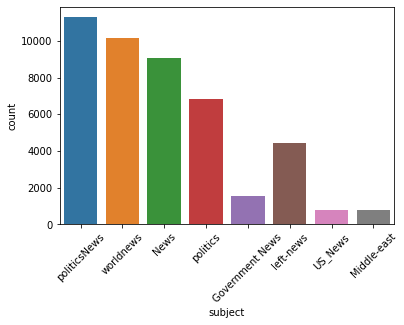

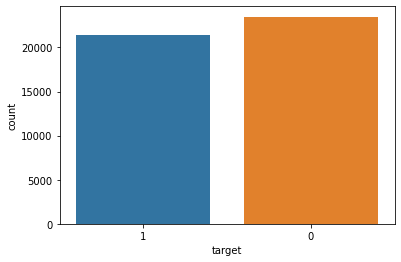

In [151]:
#V Generate a counterplot to show the number of news in each subject
plt.figure()
plt.xticks(rotation=45)
sns.countplot(x = hrdata["subject"])
plt.show()

#VI Generate a counterplot to show the number of news in each category (fake/ True)
plt.figure()
sns.countplot(x = hrdata['target'])
plt.show()

True News


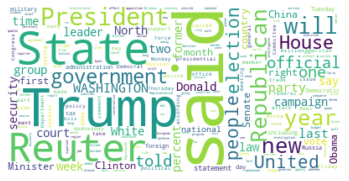


Fake News


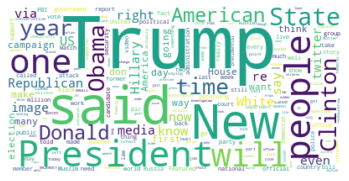

In [159]:
#VII Generate two word clouds, one for fake news and one for true news, and observe the most frequent words in each category and just write your observation on them
#true news
print("True News")
text = " ".join(cat for cat in hrdata['text'].loc[hrdata["target"] == "1"])
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#fake news
print("\nFake News")
text = " ".join(cat for cat in hrdata['text'].loc[hrdata["target"] == "0"])
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

VII Observations
* The word Trump seems to be used more in fake news articles than true ones. The words Clinton and Obama seem to be more commonly used in fake news than true, one possibility is that the target of the articles may be more likely to read the fake article if it includes these two people. One last interesting observation is that Reuter is used way more in true news articles than fake ones, this could indicate that true news articles are more likely to site sources, or at least reference Reuters than fake news articles. 

In [153]:
#VIII Create a column "AllText" that has the concatenated subject, title, and text
col = ["subject", "title", "text"]
hrdata["AllText"] = hrdata[col].apply(lambda row: '_'.join(row.values.astype(str)), axis = 1)

In [154]:
#IX Using the dataframe's copy function, save the data frame into another dataframe so that you can use it later
newhrdata = hrdata.copy()

In [155]:
#X Drop the title, text, subject, and date columns from the data frame as we will not use them separately. We have all the text in a single column that you have generated above
newhrdata = newhrdata.drop(["title", "text", "subject", "date"], axis = 1)

In [156]:
#XI Calculate the length of each text (I mean AllText column) and put them in a length column
newhrdata["length"] = hrdata["AllText"].apply(lambda row: len(row))

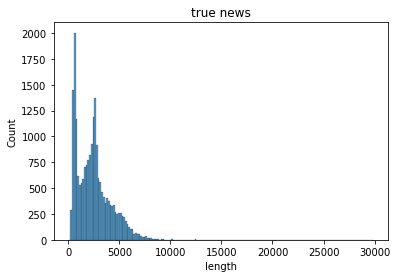

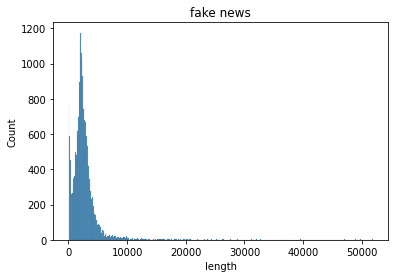

In [157]:
#XII Plot two histograms to see the distribution of the lengths. One for fake news and one for true news. Write in words about the plots
plt.figure()
plt.title("true news")
sns.histplot(newhrdata["length"].loc[newhrdata["target"] == "1"])
plt.show()

plt.figure()
plt.title("fake news")
sns.histplot(newhrdata["length"].loc[newhrdata["target"] == "0"])
plt.show()

XII Write in words about the plots
* It looks like fake news articles are typically longer than true news articles. Perhaps there is a trend where those who write fake news articles write more in order to make their articles more believable or more attractive.

XIII Write in Words: What is TFIDF? How to create bag of words using sklearn? And how to generate TFIDF for the bag of words?
*   TFIDF is a way to measure how important a word is across all documents by rewarding frequent use in one document but punishing frequent use in all documents. This way words that add noise are still punished since they don't really tell us alot about the actual document but words like soccer and sports are still rewarded since they may be used frequently in one but never in another.  
*   Using countVectorizer you can convert a group of documents into a matrix of token counts, then use the TfidfTransformer to convert the counts into weighted TFIDF scores


#2. Train Test Split



In [129]:
#I Import related libraries and perform train test split. Keep 20% data in the test set
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import sklearn.metrics as metrics
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

X = hrdata['AllText']
y = hrdata['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

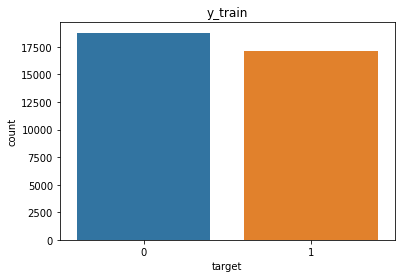

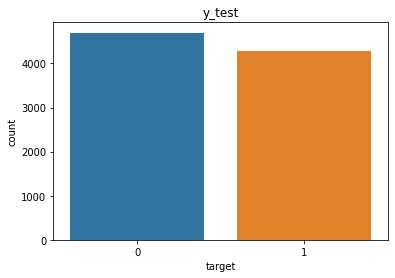

In [119]:
#II Using a count plot show how many real and fake news do we have in the training set and how many in the test set
plt.figure()
plt.title("y_train")
sns.countplot(x = y_train)
plt.show()

plt.figure()
plt.title("y_test")
sns.countplot(x = y_test)
plt.show()

#3. Training and Testing Fake news classifier using MultinomialNB



In [123]:
#I Create a pipeline that will use countVectorizer with the function you have created earlier for data preprocessing, then use Tftransformer and then use the NaiveBayes classifier
stemmer = LancasterStemmer()
stopwordList = stopwords.words('english')

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Tokenize
    3. convert them to lower case
    4. Remove all stopwords
    3. Perform stemming
    4. Returns a list of the cleaned text
    """

   

    # Check characters to see if they are in punctuation
    mess = [char for char in mess if char not in string.punctuation]
     # Join the characters again to form the string.
    mess = ''.join(mess)

    words = nltk.word_tokenize(mess)
    words = [t for t in words if t not in stopwordList]
    words = [stemmer.stem(w.lower()) for w in words]

    return words

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])


In [127]:
#II Fit the pipeline and then perform prediction
pipeline.fit(X_train,y_train)
pred = pipeline.predict(X_test)

In [130]:
#III Generate classification report and confusion matrix (you have to achieve at least 96% accuracy for the test set to receive full credit)
print(classification_report(pred,y_test))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4685
           1       0.95      0.95      0.95      4295

    accuracy                           0.96      8980
   macro avg       0.96      0.96      0.96      8980
weighted avg       0.96      0.96      0.96      8980

[[4492  204]
 [ 193 4091]]


IV Discuss the performance like how good the model is overall, how good is it in predicting fake news, and how good is it in predicting true news.
*   This model appears to be insanely accurate in its predictions of both fake and true news articles. This is likely due to the use of specific words reports and writers use when creating articles, making this type of model very accurate since it is able to recognize these specific words and commonalities and their abscence in fake and true articles


In [134]:
#V Copy a part of any news of your choice from a news website and then use the model to predict whether is it true or not. 
newSMS = "Dozens of products sold under the brand name Elite are being recalled in Canada over fears of salmonella contamination."
pipeline.predict([newSMS])

array(['0'], dtype='<U1')

#4. Training and Testing a Deep Neural Network

In [135]:
#I Import related library for using MLPClassifier from sklearn neural netowrk.
from sklearn.neural_network import MLPClassifier

In [136]:
#II Create a pipeline like 3i, for MLPClassfier you should use at least two layers and also should verbose = 2 (you can use other parameters as you wish or use the one you see from the uploaded google colab)
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MLPClassifier(hidden_layer_sizes=(100,4), random_state=0, early_stopping=True, verbose=2)),  # train on TF-IDF vectors w/ MLPClassifier classifier with two hidden layers
])

In [137]:
#III Fit the pipeline and then perform prediction
pipeline.fit(X_train,y_train)
pred = pipeline.predict(X_test)

Iteration 1, loss = 0.32590260
Validation score: 0.989978
Iteration 2, loss = 0.02926850
Validation score: 0.994710
Iteration 3, loss = 0.00900176
Validation score: 0.994432
Iteration 4, loss = 0.00473447
Validation score: 0.995267
Iteration 5, loss = 0.00309784
Validation score: 0.994710
Iteration 6, loss = 0.00239000
Validation score: 0.994710
Iteration 7, loss = 0.00199306
Validation score: 0.994710
Iteration 8, loss = 0.00173814
Validation score: 0.994710
Iteration 9, loss = 0.00155653
Validation score: 0.994710
Iteration 10, loss = 0.00141826
Validation score: 0.994432
Iteration 11, loss = 0.00130756
Validation score: 0.994710
Iteration 12, loss = 0.00121552
Validation score: 0.994432
Iteration 13, loss = 0.00113665
Validation score: 0.994710
Iteration 14, loss = 0.00106729
Validation score: 0.994710
Iteration 15, loss = 0.00100558
Validation score: 0.994432
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [138]:
#IV Generate classification report and confusion matrix (You have to achieve at least 99% accuracy to receive full credit for this model)
print(classification_report(pred,y_test))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4669
           1       1.00      0.99      1.00      4311

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

[[4662   34]
 [   7 4277]]


V Discuss the performance like how good the model is overall, how good is it in predicting fake news, and how good is it in predicting true news.
*   According to the classificaiton report and confusion matrix it is insanely good at predicting whether news is fake or true, this could also be due to the algorithm revealing specific words or commonalities that are always used in fake or true news articles. Alternatively it could be that it only works this well within this specific sample of news articles, using another sample of articles, maybe older ones, might reveal new patterns and show how media has evolved over time. 

In [139]:
#VI Use the same news you have used above and then use the model to predict whether is it true or not. 
newSMS = "Dozens of products sold under the brand name Elite are being recalled in Canada over fears of salmonella contamination."
pipeline.predict([newSMS])

array(['1'], dtype='<U1')

VII Discuss any difference in performance between this model and NB model
*   This model marks the news snippet as true while the previous one marks it as false. It also has a higher accuracy score but takes longer to fit and predict